## Event Analysis Notebook

In [32]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS
from tabulate import tabulate
import analysis_functions

In [33]:
### Load Data 
voteData = pd.read_csv(r'C:\Users\beneb\Desktop\plural_data\votes.csv')
groupData = pd.read_csv(r'C:\Users\beneb\Desktop\plural_data\users_to_groups.csv')
forumQuestions = pd.read_csv(r'C:\Users\beneb\Desktop\plural_data\forum_questions.csv')
groupCategories = pd.read_csv(r'C:\Users\beneb\Desktop\plural_data\group_categories.csv')
questionOptions = pd.read_csv(r'C:\Users\beneb\Desktop\plural_data\question_options.csv')

# print("voteData:", len(voteData))
# print("groupData:", len(groupData))
# print("forumQuestions:", len(forumQuestions))
# print("groupCategories:", len(groupCategories))

### Manual Analysis

In [34]:
# Manual analysis of a given option id 
votes = analysis_functions.get_latest_vote_by_user_and_optionid(voteData, '4ad65252-e651-460c-af6b-289769a3964b')
filtered_votes = analysis_functions.filter_zero_votes(votes)
groups = analysis_functions.get_groups_by_user_and_optionid(groupData, filtered_votes, ['0419db52-cda8-4cf2-adb2-a881234ea1f8', 'b1862f74-458c-4eb8-9445-1ccf9ccd1712'])
memberships = analysis_functions.create_group_memberships(groups)
filtered_groups = analysis_functions.remove_duplicate_groups(groups)
plurality_score = analysis_functions.connection_oriented_cluster_match(filtered_groups, filtered_votes)

# print("votes:", votes)
# print("filtered_votes:", filtered_votes)
# print("groups:", groups)
# print("memberships:", memberships)
# print("filtered_groups:", filtered_groups)
# print("plurality_score:", plurality_score)

{'e71aa119-5e1d-4e2b-a254-0d54a42bed46': 2, '24aa77ce-e416-4170-800c-70fedbfa391d': 1, '553c17da-097c-42aa-a70f-ed98430ab8d6': 1, '7a2abb33-534e-4674-8cdd-48b15b48fcc2': 2, 'becbf23b-3cde-430b-b43a-2dcd6581a99c': 1}


In [35]:
filteredVoteDict = analysis_functions.filter_zero_votes(voteDict)
print(filteredVoteDict)

{'e71aa119-5e1d-4e2b-a254-0d54a42bed46': 2, '24aa77ce-e416-4170-800c-70fedbfa391d': 1, '553c17da-097c-42aa-a70f-ed98430ab8d6': 1, '7a2abb33-534e-4674-8cdd-48b15b48fcc2': 2, 'becbf23b-3cde-430b-b43a-2dcd6581a99c': 1}


In [36]:
group_dict = analysis_functions.get_groups_by_user_and_optionid(groupData, voteDict, ['0419db52-cda8-4cf2-adb2-a881234ea1f8', 'b1862f74-458c-4eb8-9445-1ccf9ccd1712'])

# Print the resulting dictionary
# print(group_dict)

In [37]:
memberships = analysis_functions.create_group_memberships(group_dict)
# print(memberships)

In [38]:
filteredGroups = analysis_functions.remove_duplicate_groups(group_dict)

### Replication 

In [39]:
optionIds = questionOptions[questionOptions['question_id'] == '5eaea820-8b02-446c-bf17-59f6fc1799bc']['id'].tolist()
# print(len(optionIds))


In [40]:
def getResultsDict(optionIds, voteData, groupData):
    results_dict = {}

    for optionId in optionIds:
        voteDict = analysis_functions.get_latest_vote_by_user_and_optionid(voteData, optionId)
        filteredVoteDict = analysis_functions.filter_zero_votes(voteDict)
        totalRawVotes = sum(voteDict.values())
        quadraticScore = sum(math.sqrt(value) for value in voteDict.values())
        groupDict = analysis_functions.get_groups_by_user_and_optionid(groupData, filteredVoteDict, ['0419db52-cda8-4cf2-adb2-a881234ea1f8', 'b1862f74-458c-4eb8-9445-1ccf9ccd1712'])
        filteredGroups = analysis_functions.remove_duplicate_groups(groupDict)
        pluralityScore = analysis_functions.connection_oriented_cluster_match(filteredGroups, filteredVoteDict)
        results_dict[optionId] = {
            'totalRawVotes': totalRawVotes,
            'quadraticScore': quadraticScore,
            'pluralityScore': pluralityScore,
        }
    
    return results_dict


In [41]:
# Example usage
results_dict = getResultsDict(optionIds, voteData, groupData)

# Sort the dictionary by the 'result' field in descending order
sorted_results_dict = dict(sorted(results_dict.items(), key=lambda item: item[1]['pluralityScore'], reverse=True))

print(sorted_results_dict)

{'ff7441cb-84de-43e0-92d6-9dd867f13532': {'totalRawVotes': 213, 'quadraticScore': 64.65829755772951, 'pluralityScore': 59.4503386044869}, '17dc708c-70c8-4f96-b3a7-8f7cf5f3c6e4': {'totalRawVotes': 196, 'quadraticScore': 43.85820133094594, 'pluralityScore': 42.39387172663638}, 'a53c7626-86fe-45f0-9798-390ac6114a26': {'totalRawVotes': 263, 'quadraticScore': 50.42508620317105, 'pluralityScore': 39.65462616105896}, 'bf6288c3-366b-411c-8bda-b54db7c4355c': {'totalRawVotes': 124, 'quadraticScore': 41.390820503934904, 'pluralityScore': 38.5448077909873}, 'f0955a45-c50a-4757-aef2-fb17f0fbd5bd': {'totalRawVotes': 124, 'quadraticScore': 37.33537176340179, 'pluralityScore': 36.083066150971135}, 'cafbbc0b-c77f-43af-83fa-876857e1598d': {'totalRawVotes': 110, 'quadraticScore': 37.56566635452044, 'pluralityScore': 36.031127924180225}, '04596d46-a86a-4ef2-9d23-64f487cba57e': {'totalRawVotes': 82, 'quadraticScore': 31.03492658944021, 'pluralityScore': 32.765614442596096}, 'cf698fdc-4fbf-45c5-81fa-42da92f

In [42]:
# Calculate ranks for each value across all options
total_raw_votes_sorted = sorted(results_dict.items(), key=lambda x: x[1]['totalRawVotes'], reverse=True)
quadratic_score_sorted = sorted(results_dict.items(), key=lambda x: x[1]['quadraticScore'], reverse=True)
result_sorted = sorted(results_dict.items(), key=lambda x: x[1]['pluralityScore'], reverse=True)

total_raw_votes_ranks = {option[0]: rank + 1 for rank, option in enumerate(total_raw_votes_sorted)}
quadratic_score_ranks = {option[0]: rank + 1 for rank, option in enumerate(quadratic_score_sorted)}
result_ranks = {option[0]: rank + 1 for rank, option in enumerate(result_sorted)}

# Update example_dict with ranks for each value
for option in results_dict:
    results_dict[option]['totalRawVotes'] = {'score': results_dict[option]['totalRawVotes'], 'rank': total_raw_votes_ranks[option]}
    results_dict[option]['quadraticScore'] = {'score': results_dict[option]['quadraticScore'], 'rank': quadratic_score_ranks[option]}
    results_dict[option]['pluralityScore'] = {'score': results_dict[option]['pluralityScore'], 'rank': result_ranks[option]}

print(results_dict)


{'17dc708c-70c8-4f96-b3a7-8f7cf5f3c6e4': {'totalRawVotes': {'score': 196, 'rank': 3}, 'quadraticScore': {'score': 43.85820133094594, 'rank': 3}, 'pluralityScore': {'score': 42.39387172663638, 'rank': 2}}, 'f1b244ec-6e07-4d03-87f0-e00d6a05e6ed': {'totalRawVotes': {'score': 56, 'rank': 19}, 'quadraticScore': {'score': 19.398363923549343, 'rank': 17}, 'pluralityScore': {'score': 19.095224513991393, 'rank': 18}}, 'e824f8c9-05e5-4dcc-aad0-a1743b82d4a5': {'totalRawVotes': {'score': 21, 'rank': 33}, 'quadraticScore': {'score': 9.39834563766817, 'rank': 34}, 'pluralityScore': {'score': 8.611767402951559, 'rank': 34}}, 'ccddd00b-1975-4428-acea-5ddeb8392992': {'totalRawVotes': {'score': 52, 'rank': 20}, 'quadraticScore': {'score': 18.331701833426187, 'rank': 21}, 'pluralityScore': {'score': 18.71780273247449, 'rank': 19}}, '3f50f654-6670-4d4f-a18e-af8be45aab5e': {'totalRawVotes': {'score': 64, 'rank': 16}, 'quadraticScore': {'score': 25.104118675193817, 'rank': 14}, 'pluralityScore': {'score': 2

In [43]:
sorted_results_dict = dict(sorted(results_dict.items(), key=lambda item: item[1]['pluralityScore']['score'], reverse=True))
print(sorted_results_dict)


{'ff7441cb-84de-43e0-92d6-9dd867f13532': {'totalRawVotes': {'score': 213, 'rank': 2}, 'quadraticScore': {'score': 64.65829755772951, 'rank': 1}, 'pluralityScore': {'score': 59.4503386044869, 'rank': 1}}, '17dc708c-70c8-4f96-b3a7-8f7cf5f3c6e4': {'totalRawVotes': {'score': 196, 'rank': 3}, 'quadraticScore': {'score': 43.85820133094594, 'rank': 3}, 'pluralityScore': {'score': 42.39387172663638, 'rank': 2}}, 'a53c7626-86fe-45f0-9798-390ac6114a26': {'totalRawVotes': {'score': 263, 'rank': 1}, 'quadraticScore': {'score': 50.42508620317105, 'rank': 2}, 'pluralityScore': {'score': 39.65462616105896, 'rank': 3}}, 'bf6288c3-366b-411c-8bda-b54db7c4355c': {'totalRawVotes': {'score': 124, 'rank': 5}, 'quadraticScore': {'score': 41.390820503934904, 'rank': 4}, 'pluralityScore': {'score': 38.5448077909873, 'rank': 4}}, 'f0955a45-c50a-4757-aef2-fb17f0fbd5bd': {'totalRawVotes': {'score': 124, 'rank': 6}, 'quadraticScore': {'score': 37.33537176340179, 'rank': 6}, 'pluralityScore': {'score': 36.083066150

C:\Users\beneb\AppData\Local\Temp\ipykernel_11400\2417163762.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(custom_labels)


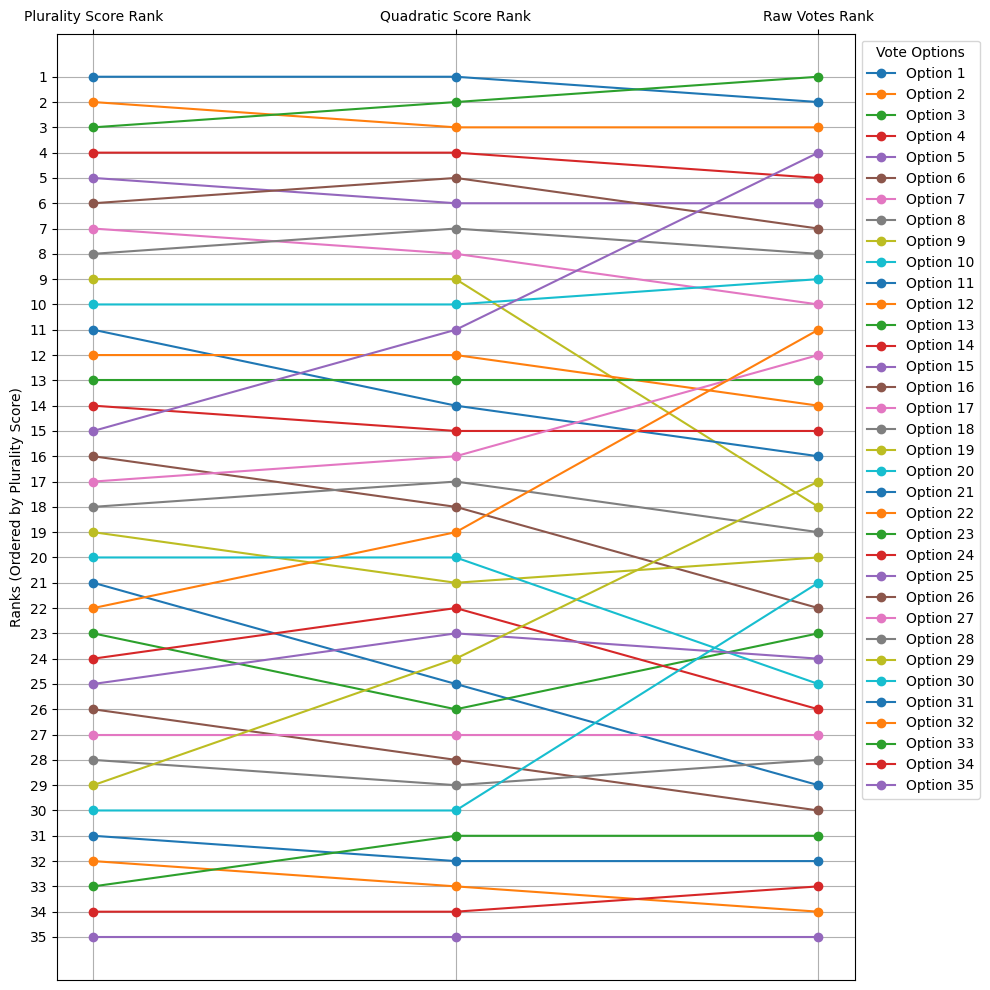

In [44]:
# Define the categories and custom labels for the x-axis
categories = ['pluralityScore', 'quadraticScore', 'totalRawVotes']
custom_labels = ['Plurality Score Rank', 'Quadratic Score Rank', 'Raw Votes Rank']

# Get the number of options
num_options = len(sorted_results_dict)

# Get a list of distinct colors from matplotlib's TABLEAU_COLORS
colors = list(TABLEAU_COLORS.values())

# Ensure enough colors for all options, if not, repeat the colors
while len(colors) < num_options:
    colors.extend(colors)

# Plotting the bump chart
plt.figure(figsize=(10, 10))

for i, (option, option_data) in enumerate(sorted_results_dict.items()):
    ranks = [option_data[category]['rank'] for category in categories]
    plt.plot(categories, ranks, marker='o', label=f'Option {i+1}', color=colors[i])

plt.gca().invert_yaxis()  # Reverse y-axis
plt.yticks(range(1, max(ranks) + 1))  # Adjust y-axis ticks
plt.xlabel('')
plt.ylabel('Ranks (Ordered by Plurality Score)')
plt.title('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Vote Options')  # Include legend title
plt.grid(True)

# Move x-axis ticks and labels to the top
plt.gca().xaxis.tick_top()

# Set custom labels for the x-axis
plt.gca().set_xticklabels(custom_labels)

plt.tight_layout()
plt.show()


C:\Users\beneb\AppData\Local\Temp\ipykernel_11400\2676900321.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(custom_labels, fontsize=14)


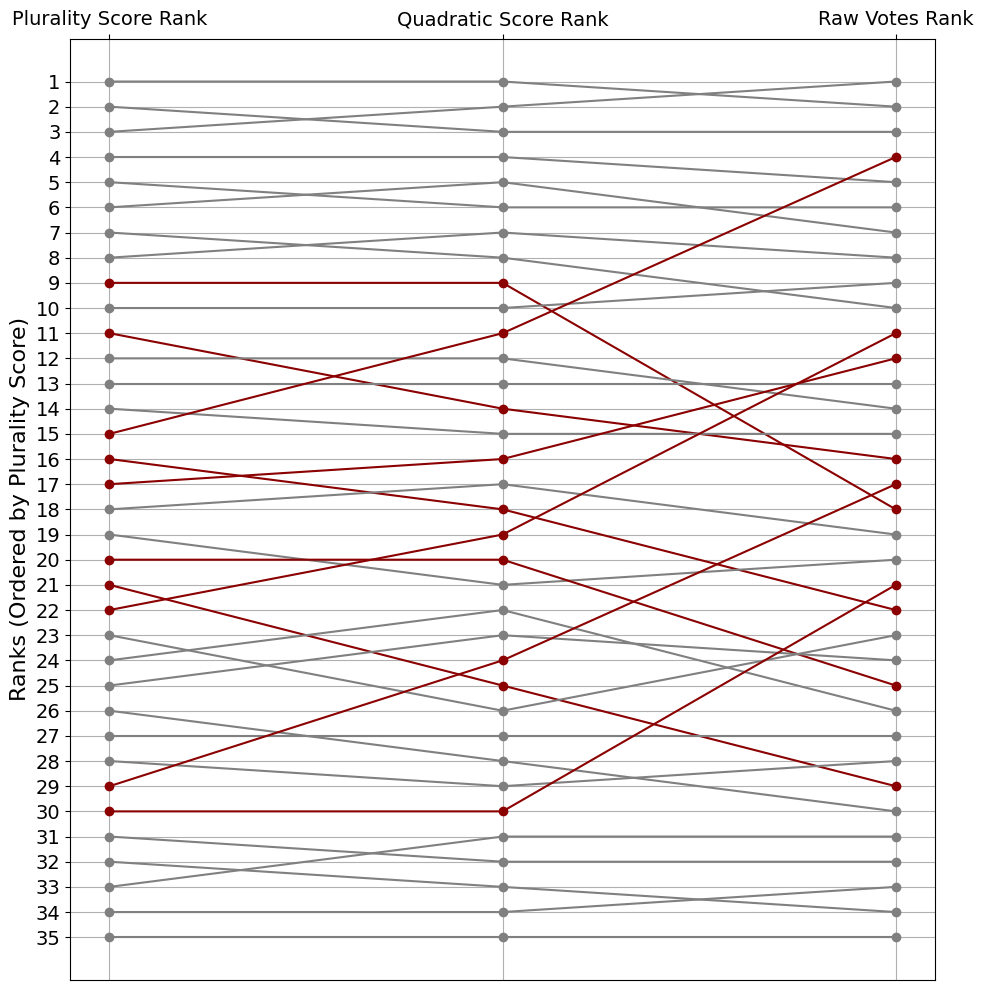

In [45]:
# Define the categories and custom labels for the x-axis
categories = ['pluralityScore', 'quadraticScore', 'totalRawVotes']
custom_labels = ['Plurality Score Rank', 'Quadratic Score Rank', 'Raw Votes Rank']

# Calculate the difference in ranks for each category
rank_diff = {}
for option, option_data in sorted_results_dict.items():
    ranks = [option_data[category]['rank'] for category in categories]
    diff = max(ranks) - min(ranks)
    rank_diff[option] = diff

# Plotting the bump chart with customized colors
plt.figure(figsize=(10, 10))

for i, (option, option_data) in enumerate(sorted_results_dict.items()):
    ranks = [option_data[category]['rank'] for category in categories]
    if rank_diff[option] > 4:
        color = 'darkred'
    else:
        color = 'gray'
    plt.plot(categories, ranks, marker='o', label=f'Option {i+1}', color=color)

plt.gca().invert_yaxis()  # Reverse y-axis
plt.yticks(range(1, max(ranks) + 1))  # Adjust y-axis ticks

# Increase the size of y-axis tick labels
plt.gca().tick_params(axis='y', labelsize=14)
# Increase the size of x-axis tick labels
plt.gca().tick_params(axis='x', labelsize=14)

# Increase the size of x-axis and y-axis labels
plt.xlabel('', fontsize=16)
plt.ylabel('Ranks (Ordered by Plurality Score)', fontsize=16)
plt.title('', fontsize=16)

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Vote Options')  # Include legend title
plt.grid(True)

# Move x-axis ticks and labels to the top
plt.gca().xaxis.tick_top()

# Set custom labels for the x-axis with increased size
plt.gca().set_xticklabels(custom_labels, fontsize=14)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('bump_chart_without_legend.png')

plt.show()




In [46]:
# Define the table data
table_data = []
headers = ['Options', 'Plurality Score', 'Quadratic Score', 'Raw Votes']

# Counter for custom option labels
option_counter = 1

for option, data in sorted_results_dict.items():
    row = [f'Option {option_counter}']
    for category in ['pluralityScore', 'quadraticScore', 'totalRawVotes']:
        row.append(round(data[category]['score'], 3))
    table_data.append(row)
    option_counter += 1  # Increment option counter

# Convert table data to DataFrame
df = pd.DataFrame(table_data, columns=headers)

# Print the DataFrame
print(tabulate(df, headers='keys', tablefmt='pretty'))

# Save DataFrame to Excel file
df.to_excel('table.xlsx', index=False)

+----+-----------+-----------------+-----------------+-----------+
|    |  Options  | Plurality Score | Quadratic Score | Raw Votes |
+----+-----------+-----------------+-----------------+-----------+
| 0  | Option 1  |      59.45      |     64.658      |    213    |
| 1  | Option 2  |     42.394      |     43.858      |    196    |
| 2  | Option 3  |     39.655      |     50.425      |    263    |
| 3  | Option 4  |     38.545      |     41.391      |    124    |
| 4  | Option 5  |     36.083      |     37.335      |    124    |
| 5  | Option 6  |     36.031      |     37.566      |    110    |
| 6  | Option 7  |     32.766      |     31.035      |    82     |
| 7  | Option 8  |      30.99      |     32.565      |    86     |
| 8  | Option 9  |     27.541      |     28.423      |    60     |
| 9  | Option 10 |     27.254      |     28.397      |    82     |
| 10 | Option 11 |     25.808      |     25.104      |    64     |
| 11 | Option 12 |     25.604      |      26.75      |    67  